# Analysis of Drug Regimens effectiveness on Tumor Volumes

This is a study of effectiveness of the treatment with various drug regimens against the skin cancer, sqauamous cell carcinoma (SCC). This is mainly focused on the camparison of Capomulin drug regimen versus other drug regimens against SCC over the course of 45 days. Three main findings of this study are as follows:

1. The aggregation of all the drug regimens with the tumor volume shows that Capomulin and Ramicane are the most stable and effective drug regimens because these two showed less variance with mean of the tumor volume. While comparing these two drugs, Ramicane shows better study results than Capomulin becuase after 45 days of study mice treated with Ramicane shows less tumor volume than mice treated with Capomulin.

2. The line graph of treatment with Capomulin drug regimen on Mouse ID 'x401' shows that the drug is effective to reduce the tumor volume even though it showed slight increase in tumor volume between the days of interval 10-15, 20-25 and 40-45. The drug's performance on the tumor showed that it could reduces the tumor volume from 45.000(mm3) to 28.484033(mm3) with in 45 days.

3. The correlation coefficient (0.8419) of mouse weight versus average tumor volume shows a fairly strong positive relationship between mouse weight and tumor volume. As the mouse weight increases tumor volume is also increases which means tumor volume depends directly on mouse weight. The liniear regression model also shows there is not much variations happened from the line.  This means each percentage of increase in mouse weight will cause almost 84% increase in tumor volume.  This relationship is one of the great insights of this study.

In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sb

In [3]:
# Study data files
# path of the data sets
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study_results=mouse_metadata.merge(study_results, how='left', on='Mouse ID')

mouse_metadata_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Copy of the dataframe created
mousedata_study_results=mouse_metadata_study_results.copy()

# Renaming column 'Tumor Volume (mm3)' to 'Tumor_volume'
mousedata_study_results=mousedata_study_results.rename(columns={'Tumor Volume (mm3)':'Tumor_volume'})

# Display the data table for preview
mousedata_study_results

# Checking the number of mice.
print("Number of mice: ", mousedata_study_results['Mouse ID'].count())

Number of mice:  1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_timepoint_dupli=mousedata_study_results[mousedata_study_results.duplicated(subset=['Mouse ID', 'Timepoint'])]
mouseid_timepoint_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
mousedata_study_results=mousedata_study_results.drop_duplicates(['Mouse ID', 'Timepoint'])
mousedata_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Finding any records associated with already droped duplicated Mouse ID 'g989'.
g989_dupli_records=mousedata_study_results.loc[mousedata_study_results['Mouse ID']=='g989']
# print(g989_dupli_records)

# Dropping the rows found through the above proces
mousedata_study=mousedata_study_results.drop(g989_dupli_records.index, axis=0)
study_results=mousedata_study.copy()
mousedata_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Get all the data for the duplicate mouse ID.
mouseid_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID'])]
mouseid_dupli.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [9]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_results=mousedata_study.drop_duplicates(['Mouse ID'], inplace=False)                                  
cleaned_mouse_data_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice after cleaning: ", cleaned_mouse_data_results['Mouse ID'].count())

# A copy of cleaned_mouse_data_results is created
cleaned_data_results=cleaned_mouse_data_results.copy()

Number of mice after cleaning:  248


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen=mousedata_study.groupby('Drug Regimen')

mean_tvolume=drug_regimen.Tumor_volume.mean()
# print("The mean of tumor volume: ", mean_tvolume)

median_tvolume=drug_regimen.Tumor_volume.median()
# print("The median of tumor volume: ", median_tvolume)

var_tvolume=drug_regimen.Tumor_volume.var()
# print("The variance of tumor volume: ", var_tvolume)

std_tvolume=drug_regimen.Tumor_volume.std()
# print("The standard deviation of tumor volume: ", std_tvolume)

sem_tvolume=drug_regimen.Tumor_volume.sem()
# print(sem_tvolume)

# Assemble the resulting series into a single summary dataframe.
agg_tumor_volume=pd.DataFrame({"Mean":mean_tvolume, "Median":median_tvolume, "Variance":var_tvolume,
                              "Standard Deviation":std_tvolume, "SEM":sem_tvolume})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_tumor_volume

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary=drug_regimen.agg({'Tumor_volume':['mean','median','var','std','sem']})

# Rename Tumor_volume to none to remove the text 'Tumor_volume' that appears above the aggregation mean, median, etc
agg_summary = agg_summary.rename(columns={'Tumor_volume':''})
agg_summary

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Drug Regimen Tests in Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

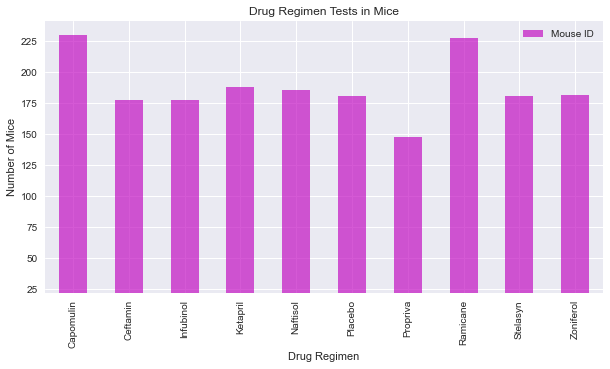

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Grouping dataframe by Drug Regimen and counting Mouse ID's
drug_reg= mousedata_study.groupby('Drug Regimen')['Mouse ID'].count()
# print(drug_reg)

plt.style.use('seaborn')
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}

# Bar plotting, labelling, and style formatting
drug_reg.plot(kind='bar', figsize=(10,5), title='Drug Regimen Tests in Mice', legend='best',
              xlabel='Drug Regimen', ylabel='Number of Mice', ylim=22, stacked=True, color='m', alpha=0.65)

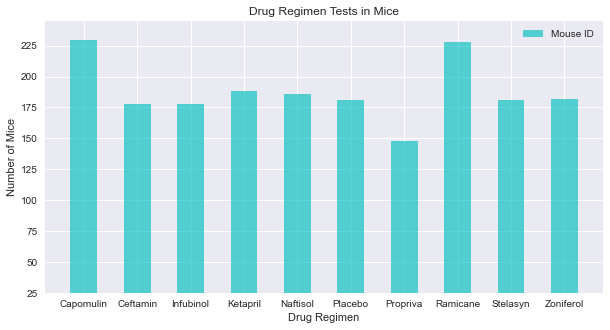

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.style.use('seaborn')

# Index values of drug_reg dataframe is stored in to a list
num_mice= drug_reg.index.tolist()
# print(num_mice)

# Finding positions of drug_reg values 
pos=np.arange(len(num_mice))
# print(pos)

# The values of drug_reg dataframe stored as a list
x_axis=list(drug_reg)
# print(x_axis)

# Figure size fixing
plt.figure(figsize=(10,5))

# Refixing the y-axis
plt.ylim([25, 245])

# Plotting figure
plt.bar(pos, x_axis, color='c', alpha=0.65, width=0.5, label='Mouse ID')

# Using xticks positional values are assigning
plt.xticks(pos, num_mice)

# Titling the bar graph
plt.title('Drug Regimen Tests in Mice')

# Labeling x_axix
plt.xlabel("Drug Regimen")

# Labeling y_axis
plt.ylabel('Number of Mice')

# Printing legend 
plt.legend(['Mouse ID'])


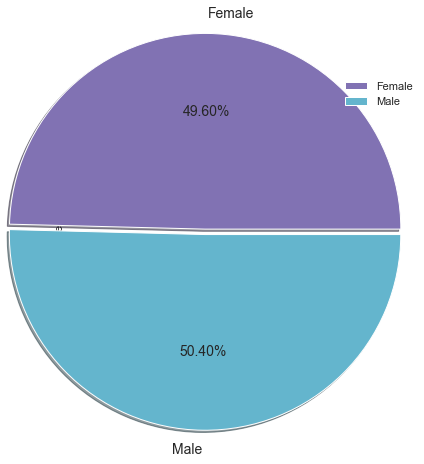

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sb.set()
# Grouping cleaned dataframe by Sex
ml_fl_mice = cleaned_data_results.groupby('Sex')['Mouse ID'].count()
# print(ml_fl_mice)

colors=['m', 'c']
explode = (0.05,0)

# Pie plotting, labelling and formatting 
ml_fl_mice.plot(kind='pie', subplots=True, figsize=(5,5), autopct='%0.2f%%', colors=colors,
               labels=['Female', 'Male'], radius=1.8, explode=explode, fontsize=14, shadow=True)
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))

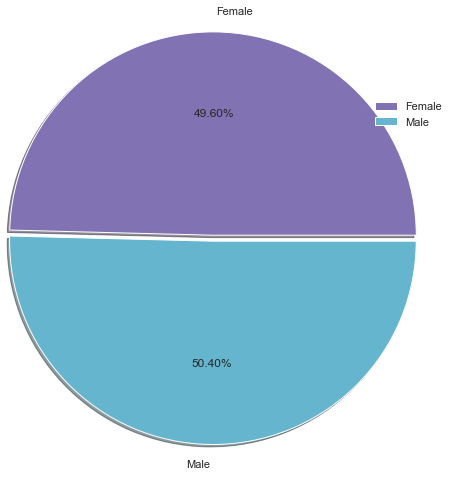

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels in a list
labels=(['Female', 'Male'])

# Pie plotting distribution of female versus male mice and style formatting with labels and legends
plt.pie(ml_fl_mice, labels=labels, colors=colors, autopct="%1.2f%%", radius=1.7, explode=explode, shadow=True)

plt.legend(['Female', 'Male'],loc="upper right", bbox_to_anchor=(1.3,1.0))

## Quartiles, Outliers and Boxplots

In [17]:
# Start by getting the last (greatest) timepoint for each mouse

# Filtering the dataframe for four drug regimen
treatment_regimen1 = mousedata_study[mousedata_study["Drug Regimen"].isin(["Capomulin", 
                                                                           "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimen1

# Sorting the above dataframe by selecting required columns by Timepoint
treatment_regimen2 = treatment_regimen1[['Mouse ID','Timepoint', 'Tumor_volume', 'Drug Regimen']
                                       ].sort_values(by='Timepoint', ascending=True)
treatment_regimen2

# Grouping the above dataframe by Drug Regimen and Mouse ID to the final periods of time series \n
# timepoint and tumor volume and then resetting the index
treatment_regimen=treatment_regimen2.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint',
                                                                                   'Tumor_volume']].reset_index()
treatment_regimen


,Drug Regimen,Mouse ID,Timepoint,Tumor_volume
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [18]:
# Determine outliers using upper and lower bounds and box and whisker plotting

# Extracting dataframe with drug regimen 'Capomulin'
capomulin_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Capomulin'].reset_index()
# print(capomulin_regimen)

# Sorting dataframe by Tumor Volume
capomulin_treatment=capomulin_regimen.Tumor_volume.sort_values()
# print(capomulin_treatment)
    
# Calculating lower and upper quartiles, median and IQR
quartiles = capomulin_treatment.quantile([0.25,0.5,0.75])
capo_lowerq = quartiles[0.25]
capo_upperq = quartiles[0.75]
capo_median = quartiles[0.5]
capo_iqr = capo_upperq-capo_lowerq

# Calculating lower and upper bounds
capo_lbound = capo_lowerq - (1.5*capo_iqr)
capo_ubound = capo_upperq + (1.5*capo_iqr)

In [19]:
# Extracting dataframe with drug regimen 'Ramicane'
ramicane_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Ramicane'].reset_index()
# print(ramicane_regimen)

# Sorting dataframe by Tumor Volume
ramicane_treatment=ramicane_regimen.Tumor_volume.sort_values()
# print(ramicane_regimen)

# Calculating lower and upper quartiles, median and IQR
quartiles = ramicane_treatment.quantile([.25,.5,.75])
rami_lowerq = quartiles[0.25]
rami_upperq = quartiles[0.75]
rami_median = quartiles[0.5]
rami_iqr = rami_upperq-rami_lowerq

# Calculatting upper and lower bounds
rami_lbound = rami_lowerq - (1.5*rami_iqr)
rami_ubound = rami_upperq + (1.5*rami_iqr)

In [20]:
# Extracting dataframe with drug regimen 'Infubinol' and resetting the index
infubinol_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Infubinol'].reset_index()
# print(infubinol_regimen)

# Sorting dataframe by Tumor Volume
infubinol_treatment=infubinol_regimen.Tumor_volume.sort_values()
# print(infubinol_regimen)

# Calculating lower and upper quartiles, median and IQR
quartiles = infubinol_treatment.quantile([.25,.5,.75])
infu_lowerq = quartiles[0.25]
infu_upperq = quartiles[0.75]
infu_median = quartiles[0.5]
infu_iqr = infu_upperq-infu_lowerq

# Calculating lower and upper bounds
infu_lbound = infu_lowerq - (1.5*infu_iqr)
infu_ubound = infu_upperq + (1.5*infu_iqr)

In [21]:
# Extracting dataframe for drug regimen 'Ceftamin' and resetting index
ceftamin_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Ceftamin'].reset_index()
# print(ceftamin_regimen)

# Sorting dataframe by Tumor Volume 
ceftamin_treatment=ceftamin_regimen.Tumor_volume.sort_values()
# print(ceftamin_regimen)

#Calculating lower and upper quartiles, median and IQR
quartiles = ceftamin_treatment.quantile([.25,.5,.75])
ceft_lowerq = quartiles[0.25]
ceft_upperq = quartiles[0.75]
ceft_median = quartiles[0.5]
ceft_iqr = ceft_upperq-ceft_lowerq

# Calculating lower and upper bounds
ceft_lbound = ceft_lowerq - (1.5*ceft_iqr)
ceft_ubound = ceft_upperq + (1.5*ceft_iqr)

In [22]:
# Four drug regimens' quartiles and outliers with tumor volume in a single table
quartiles_outliers=pd.DataFrame({'Lower Quartile':[capo_lowerq, ceft_lowerq, rami_lowerq, infu_lowerq],
              'Upper Quartile':[capo_upperq, ceft_upperq, rami_upperq, infu_upperq],
              'IQR':[capo_iqr, ceft_iqr, rami_iqr, infu_iqr],
              'Median':[capo_median, ceft_median, rami_median, infu_median],
              'Below Outliers':[capo_lbound, ceft_lbound, rami_lbound, infu_lbound],
              'Above Outliers':[capo_ubound, ceft_ubound, rami_ubound, infu_ubound]},
             index=['Capomulin','Ceftamin','Ramicane','Infubinol'])
quartiles_outliers

,Lower Quartile,Upper Quartile,IQR,Median,Below Outliers,Above Outliers
Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458
Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446


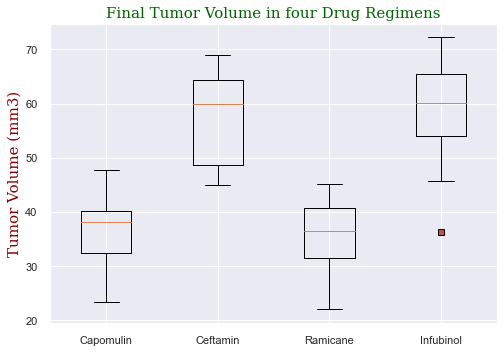

In [23]:
# Box and whisker plot of four drug regimen with tumor volume
# Style formatting the outliers
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()

# List of four drug regimens
drugs=[capomulin_treatment, ceftamin_treatment, ramicane_treatment,  infubinol_treatment]

# Plotting the drug regimens
ax.boxplot(drugs, flierprops=red_square)

# Titling, labelling and formatting
ax.set_title("Final Tumor Volume in four Drug Regimens", fontdict=font1)

ax.set_ylabel("Tumor Volume (mm3)", fontdict=font2)

# xticking for labeling the drug regimens
plt.xticks([1,2,3,4], ['Capomulin','Ceftamin','Ramicane','Infubinol'])
plt.show()


## Line and Scatter Plots

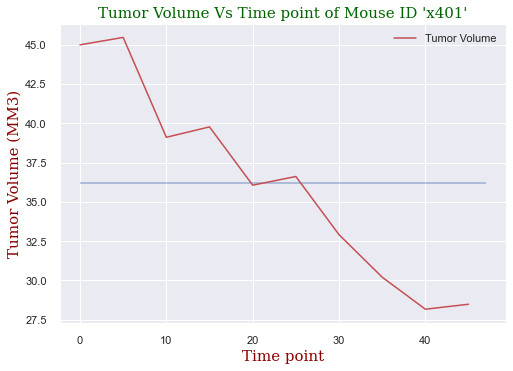

In [24]:
# Line plot of Capomulin drug regimen with Timepoint and Tumor Volume

# One 'Mouse ID' x401 is selected for line plot and filtered with tumor volume and timepoint
mouse_capo_tpoint=study_results.loc[study_results['Mouse ID']=='x401', 
                                    ['Tumor_volume', 'Timepoint']].reset_index()

# Sorting the above created dataframe by Timepoint
mouse_capo_tpoint=mouse_capo_tpoint[['Tumor_volume', 'Timepoint']
                                   ].sort_values(by='Timepoint')
# Horizontal line created
plt.hlines(36.18,0,47,alpha=0.5)

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin regimen
plt.plot(mouse_capo_tpoint.iloc[:,1], mouse_capo_tpoint.iloc[:,0], color='r', label='Tumor Volume')
plt.legend(loc="best")

# Titling, labeling, and style formatting
plt.title("Tumor Volume Vs Time point of Mouse ID 'x401'", fontdict = font1)
plt.xlabel("Time point", fontdict = font2)
plt.ylabel("Tumor Volume (MM3)", fontdict = font2)
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Make a dataframe by sorting tumor volume
capo_mouse_weight = mousedata_study[['Mouse ID','Drug Regimen', 'Weight (g)', 'Tumor_volume'
                                     ]].sort_values(by='Tumor_volume')
# Filtering dataframe by drug regimen 'Capomulin'
capo_mouse_weight=capo_mouse_weight.loc[capo_mouse_weight['Drug Regimen']=='Capomulin']

# Calculating average tumor volume by grouping 'Mouse ID' and Mouse weight and resetting the index
avg_tumor_vol=pd.DataFrame(capo_mouse_weight.groupby(['Mouse ID', 'Weight (g)'])['Tumor_volume'].mean().reset_index())

# avg_tumor_vol

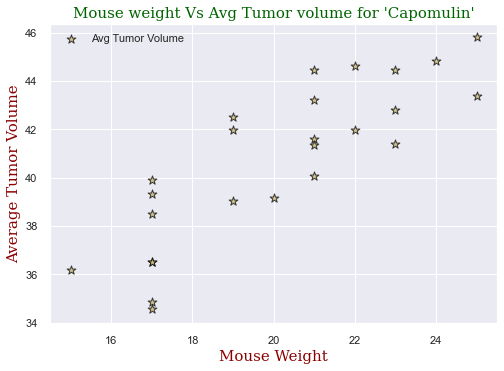

In [26]:
# Scatter plotting, mouse weight with average tumor volume for the Capomulin regimen
fig, ax = plt.subplots()

# Scatter plotting and style formatting
plt.scatter(avg_tumor_vol.iloc[:,1], avg_tumor_vol.iloc[:, 2], marker='*', 
            edgecolor='black', s=85, alpha=0.75, c ='y', label="Avg Tumor Volume")

ax.legend(loc="best")

# Titling, labeling, and formatting
plt.title("Mouse weight Vs Avg Tumor volume for 'Capomulin'", fontdict = font1)
plt.xlabel('Mouse Weight', fontdict = font2)
plt.ylabel('Average Tumor Volume', fontdict = font2)

# Making a grid view
ax.grid(True)
plt.show()

## Correlation and Regression


Correlation coefficient for mouse weight Vs average tumor volume: 0.8419

y = 0.95x + 21.55



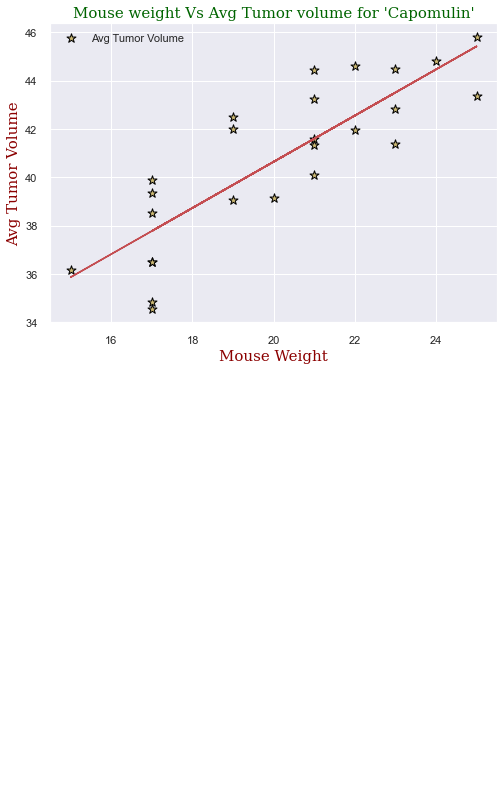

In [29]:
# Correlation coefficient modeling, mouse weight Vs average tumor volume for the Capomulin regimen

# Listing mouse weight and tumor volume
mouse_wt=avg_tumor_vol.loc[:,'Weight (g)']
tumor_vl=avg_tumor_vol.loc[:,'Tumor_volume']

# Pearson correlation coefficient for mouse weight and average tumor volume
correlation = sts.pearsonr(mouse_wt, tumor_vl)

print('')
print(f'Correlation coefficient for mouse weight Vs average tumor volume: {round(correlation[0],4)}')
print('')

# Linear regression model for mouse weight with average tumor volume for the Capomulin regimen

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_wt, tumor_vl)

# Calculating the regression value
regress_values = mouse_wt * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting and labeling
plt.scatter(mouse_wt,tumor_vl, label="Avg Tumor Volume", c='y', marker='*', s=90, edgecolor='black')
ax.legend(loc="best")

# Regression line plotting and style formatting
plt.plot(mouse_wt,regress_values,"r-")
plt.annotate(line_eq,(15,15),fontsize=15,color="red")

print(line_eq)
print('')

# Titling, labeling and formatting the plot
plt.title("Mouse weight Vs Avg Tumor volume for 'Capomulin'", fontdict = font1)
plt.xlabel('Mouse Weight', fontdict = font2)
plt.ylabel('Avg Tumor Volume', fontdict = font2)

# Making grid
ax.grid(True)
plt.show()
